ARIMA and S-ARIMA (Seasonal) [link text](https://people.duke.edu/~rnau/Slides_on_ARIMA_models--Robert_Nau.pdf)

Source [link text](https://people.duke.edu/~rnau/411arim3.htm)

Parameters [link text](https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/)


In [1]:
!pip install pmdarima
import pandas as pd
import numpy as np
from google.colab import files 

     |████████████████████████████████| 1.4 MB 34.2 MB/s 
     |████████████████████████████████| 9.8 MB 31.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# Read your csv file as dataframe
df = pd.read_csv('aapl.us.txt', index_col='Date', parse_dates = True)
# Removes any null values
df = df.dropna()

# Data for last number of years
df = df.last('7Y')

# Data after a certain point in time
# df = df.loc[df['Date'] >= '2000-01-01']

print('Shape of data', df.shape)
print(df.head(10))

# Choose your attribute "Open", "High", "Low", "Close", "Volume", "OpenInt"
attribute = 'Close'

Shape of data (1728, 6)
              Open    High     Low   Close     Volume  OpenInt
Date                                                          
2011-01-03  41.600  42.293  41.600  42.204  123930383        0
2011-01-04  42.579  42.579  42.023  42.426   86135637        0
2011-01-05  42.260  42.817  42.196  42.772   70669988        0
2011-01-06  42.902  42.932  42.632  42.739   83619699        0
2011-01-07  42.787  43.073  42.503  43.045   86506108        0
2011-01-10  43.393  43.956  43.179  43.855  124888228        0
2011-01-11  44.176  44.178  43.473  43.752  123434986        0
2011-01-12  43.980  44.109  43.795  44.108   84228710        0
2011-01-13  44.202  44.389  44.032  44.267   82692975        0
2011-01-14  44.310  44.627  44.110  44.627   85758149        0


In [3]:
#data preprocessing

#We parse the date to the correct format
df.index = pd.to_datetime(df.index)
#df.info()

df_month = df.groupby(pd.Grouper(freq='M')).mean()
df_quarter = df.groupby(pd.Grouper(freq='Q')).mean()

#creating another date column for month, year and quarter so we can 'groupby' later
# df['month'] = df.index.dt.to_period("M")
# df['year'] = df['Date'].dt.to_period("Y")
# df['quarter'] = df['Date'].dt.quarter

#df for Monthly
# df_month = df.groupby(['month']).agg(
#     mean_open = pd.NamedAgg(column='Open', aggfunc='mean'),
#     mean_high = pd.NamedAgg(column='High', aggfunc='mean'),
#     mean_low = pd.NamedAgg(column='Low', aggfunc='mean'),
#     mean_close = pd.NamedAgg(column='Close', aggfunc='mean'),
#     mean_volume = pd.NamedAgg(column='Volume', aggfunc='mean')
# )

#df for Quarterly 
# df_quarter = df.groupby(['year', 'quarter']).agg(
#     mean_open = pd.NamedAgg(column='Open', aggfunc='mean'),
#     mean_high = pd.NamedAgg(column='High', aggfunc='mean'),
#     mean_low = pd.NamedAgg(column='Low', aggfunc='mean'),
#     mean_close = pd.NamedAgg(column='Close', aggfunc='mean'),
#     mean_volume = pd.NamedAgg(column='Volume', aggfunc='mean')
# )

# df for fixed number of points
# df = df[-30:]
# df_month = df_month[-30:]
# df_year = df_year[-30:]

print(df.head(10))
print(df_month.head(10))
print(df_quarter.head(10))


              Open    High     Low   Close     Volume  OpenInt
Date                                                          
2011-01-03  41.600  42.293  41.600  42.204  123930383        0
2011-01-04  42.579  42.579  42.023  42.426   86135637        0
2011-01-05  42.260  42.817  42.196  42.772   70669988        0
2011-01-06  42.902  42.932  42.632  42.739   83619699        0
2011-01-07  42.787  43.073  42.503  43.045   86506108        0
2011-01-10  43.393  43.956  43.179  43.855  124888228        0
2011-01-11  44.176  44.178  43.473  43.752  123434986        0
2011-01-12  43.980  44.109  43.795  44.108   84228710        0
2011-01-13  44.202  44.389  44.032  44.267   82692975        0
2011-01-14  44.310  44.627  44.110  44.627   85758149        0
                 Open       High        Low      Close        Volume  OpenInt
Date                                                                         
2011-01-31  43.227050  43.647500  42.819050  43.333900  1.506116e+08      0.0
2011-02-28

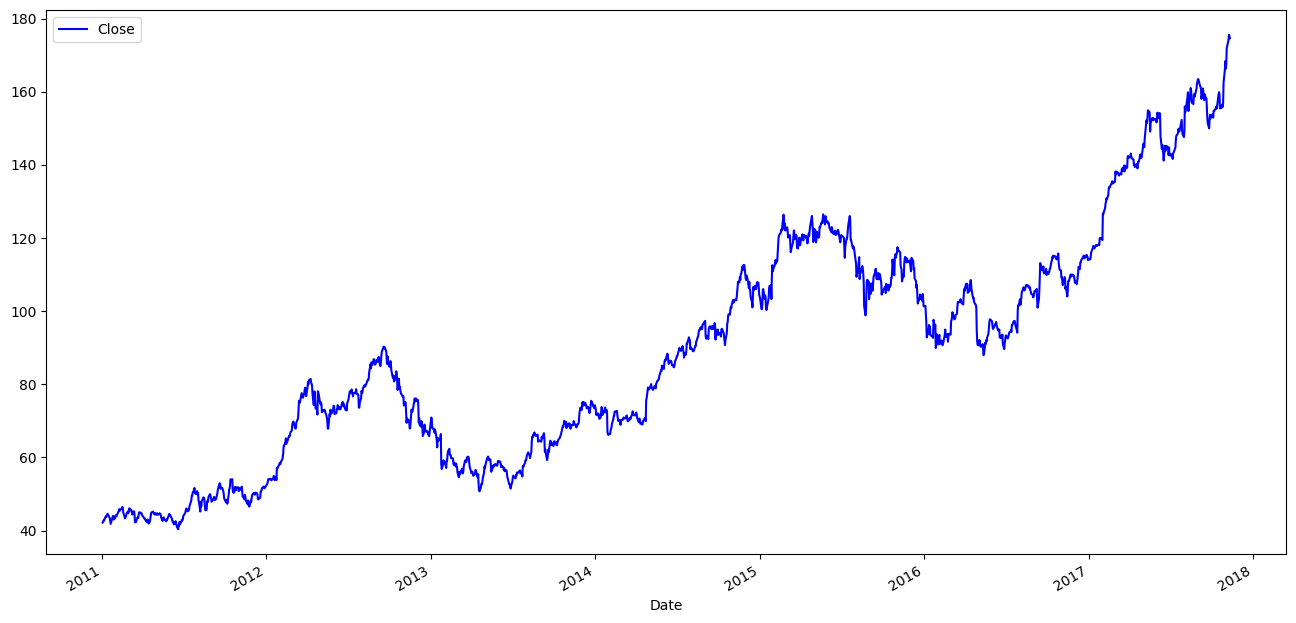

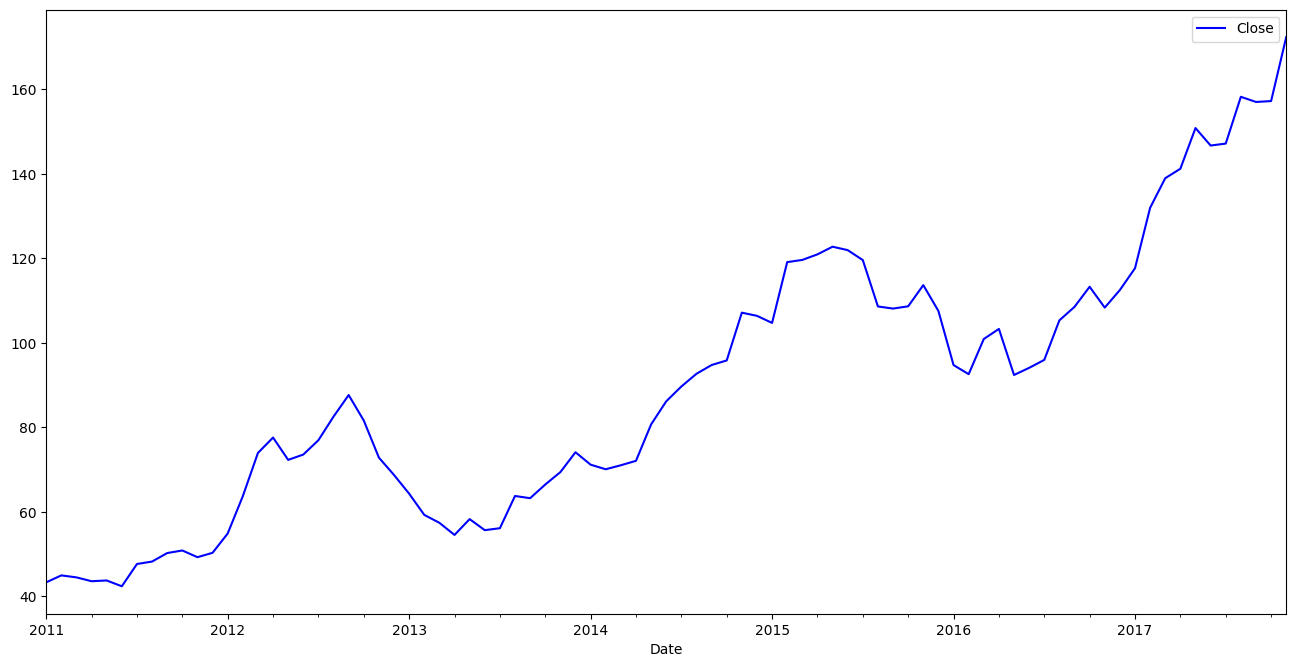

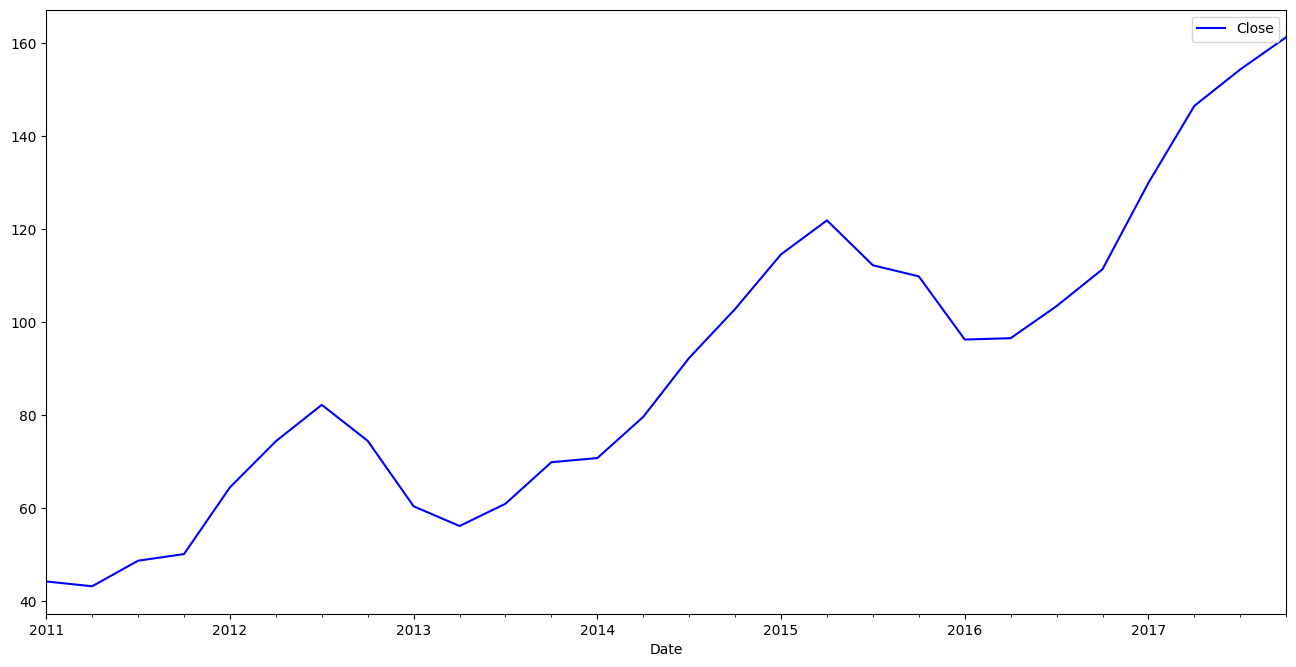

In [4]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(16,8), dpi=100)
df['Close'].plot(legend = True, color='blue')

figure(figsize=(16,8), dpi=100)
df_month[attribute].plot(legend = True, color='blue')

figure(figsize=(16,8), dpi=100)
df_quarter[attribute].plot(legend = True, color='blue')

# Set the correct attribute and dataset

In [5]:
#df can equal df, df_month and df_quarter
# df = df
df = df_month
# df = df_quarter
#attribute can be 'Close', 'mean_close', 
# attribute = 'Close'
# attribute = 'mean_close'

Make sure that your data is stationary

In [6]:
from statsmodels.tsa.stattools import adfuller
# This will tell us if the data is stationary
# We want to know the P-Value, we want as small as possible!
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values: ")
  for k, v in dftest[4].items():
    print("\t", k, ": ", v)

In [7]:
ad_test(df[attribute])

1. ADF:  0.43055408932603095
2. P-Value:  0.9826022898283641
3. Num of Lags:  1
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  81
5. Critical Values: 
	 1% :  -3.5137900174243235
	 5% :  -2.8979433868293945
	 10% :  -2.5861907285474777


In [8]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [9]:
print(df.shape)
percent = 0.7 #choose between 0 and 1
num_of_train = int(df.shape[0]*(percent))
train = df.iloc[:num_of_train]
test = df.iloc[num_of_train:]
print(train.shape, test.shape)
print(train)

(83, 6)
(58, 6) (25, 6)
                  Open        High  ...        Volume  OpenInt
Date                                ...                       
2011-01-31   43.227050   43.647500  ...  1.506116e+08      0.0
2011-02-28   44.860684   45.227368  ...  1.360928e+08      0.0
2011-03-31   44.562087   44.865000  ...  1.368779e+08      0.0
2011-04-30   43.714250   44.014650  ...  1.285560e+08      0.0
2011-05-31   43.799476   44.089857  ...  9.169691e+07      0.0
2011-06-30   42.505636   42.847500  ...  1.172283e+08      0.0
2011-07-31   47.452300   48.045450  ...  1.481418e+08      0.0
2011-08-31   48.313174   48.900174  ...  1.949242e+08      0.0
2011-09-30   50.261190   50.868667  ...  1.587788e+08      0.0
2011-10-31   50.809810   51.457905  ...  1.740485e+08      0.0
2011-11-30   49.473905   49.800667  ...  1.189414e+08      0.0
2011-12-31   50.294619   50.669524  ...  8.358038e+07      0.0
2012-01-31   54.912000   55.195300  ...  9.556505e+07      0.0
2012-02-29   63.362900   64.139

In [10]:
# The magic
#SEASONAL PERIOD SET TO M: Daily = 7, Monthly = 12, Weekly = 52, Quarterly = 4, 1 = Annual
stepwise_fit = auto_arima(train[attribute], trace = True, seasonal=True, m = 12, suppress_warnings = True, n_jobs=-1)
#model_auto = auto_arima(train[attribute], seasonal = True, m = 12, n_jobs=-1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=339.618, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=338.714, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=337.530, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=341.059, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=336.833, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=338.395, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=338.708, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=336.974, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=337.012, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 2.141 seconds


In [11]:
#model_auto.summary()
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -165.416
Date:                Fri, 12 Nov 2021   AIC                            336.833
Time:                        15:36:50   BIC                            342.962
Sample:                             0   HQIC                           339.215
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1444      0.779      1.468      0.142      -0.383       2.672
ma.L1          0.3043      0.148      2.050      0.040       0.013       0.595
sigma2        19.3849      3.143      6.167      0.000      13.224      25.546
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.97   Prob(JB):                         0.17
Heteroskedasticity (H):               2.52   Skew:                             0.37
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Explaining why the model selects the parameters

Given (p, d, q) where d is the differencing done to make the data stationary. We plot this below to explain how the differencing has now affected the graph and its p-value!

1. ADF:  -2.4783181170491826
2. P-Value:  0.12083927737171157
3. Num of Lags:  5
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  75
5. Critical Values: 
	 1% :  -3.520713130074074
	 5% :  -2.9009249540740742
	 10% :  -2.5877813777777776


<Figure size 8000x4000 with 0 Axes>

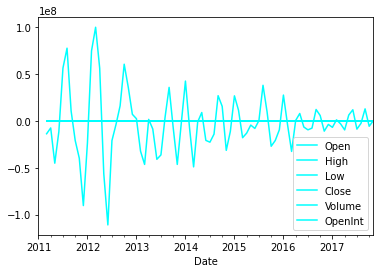

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
df.diff(2).plot(legend = True, color='cyan', )
ad_test(df.diff(2).dropna()[attribute])

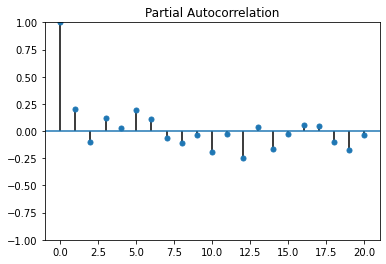

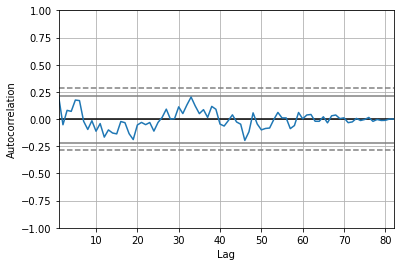

In [13]:
from pmdarima.utils import *
differencing = 1
plot_pacf(df[attribute].diff(differencing).dropna(), show=True) 
autocorr_plot(df[attribute].diff(differencing).dropna(), show=True) 
#decomposed_plot(df[attribute], show=True) 

# Fitting the model

In the previous cells, we have determined the parameters for the model with auto_arima. 
> Here, we can either make use of 
1.   statsmodels library to fit the model OR
2.   continue using pmdarima library


# pmdarima.ARIMA

In [14]:
import pmdarima as pm

model = pm.ARIMA(order = (0,1,1), seasonal_order=(0,0,0,12))
model.fit(train[attribute])

start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(n_periods = len(test))
pred = pd.DataFrame(pred)
pred.index = df.index[start:end+1]

# from matplotlib.pyplot import figure
# figure(figsize=(20,10), dpi=400)
# pred.plot(legend = True, color='cyan', )
# test[attribute].plot(legend = True, color='red')
# train[attribute].plot(legend = True, color='blue')

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -165.416
Date:                Fri, 12 Nov 2021   AIC                            336.833
Time:                        15:36:51   BIC                            342.962
Sample:                             0   HQIC                           339.215
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1444      0.779      1.468      0.142      -0.383       2.672
ma.L1          0.3043      0.148      2.050      0.040       0.013       0.595
sigma2        19.3849      3.143      6.167      0.000      13.224      25.546
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.97   Prob(JB):                         0.17
Heteroskedasticity (H):               2.52   Skew:                             0.37
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# We can observe the models diagnostics.

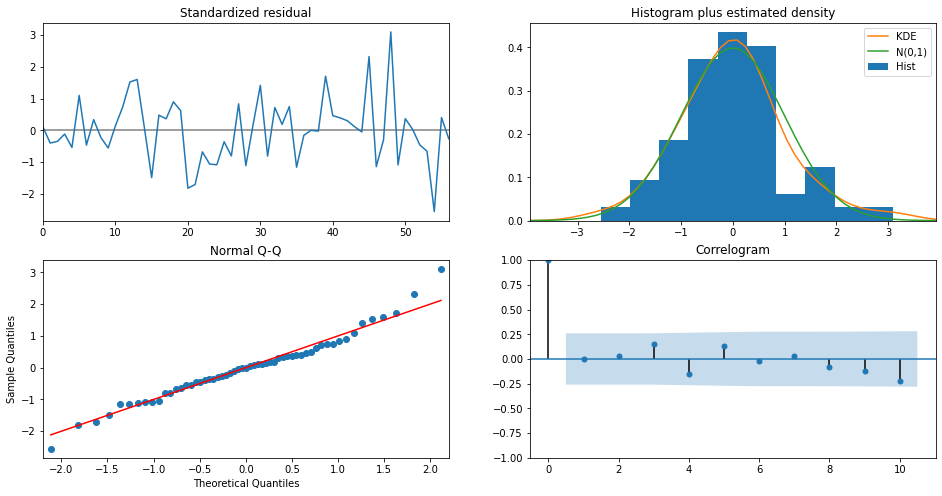

In [16]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(16,8))
plt.show()

Here, we predict without updating model parameters along the way.

<Figure size 8000x4000 with 0 Axes>

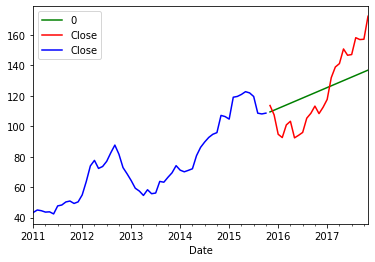

In [18]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
pred.plot(legend = True, color='green', )
test[attribute].plot(legend = True, color='red')
train[attribute].plot(legend = True, color='blue')

In [ ]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(test[attribute], pred))
print(rmse)

17.392337413485137


# Generate in-sample predictions from the fit ARIMA model.

Predicts the original training (in-sample) time series values. This can be useful when wanting to visualize the fit, and qualitatively inspect the efficacy of the model, or when wanting to compute the residuals of the model.



In [ ]:
in_sample = model.predict_in_sample()
in_sample = pd.DataFrame(in_sample)
in_sample.index = train.index

<Figure size 8000x4000 with 0 Axes>

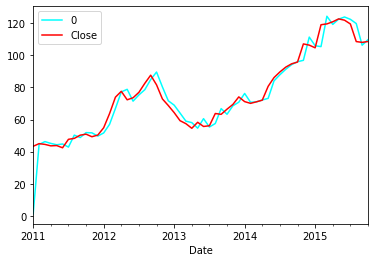

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=400)
in_sample.plot(legend = True, color='cyan')
train[attribute].plot(legend = True, color='red')


# Can we do better? - Step wise forecasting




This is different from earlier part where we just predict for the entire 30% range at one go. Here, we are predicting one step and then check the actual and make auto adjustments to the model.

Update the model fit with additional observed endog/exog values.

Updating an ARIMA adds new observations to the model, updating the MLE of the parameters accordingly by performing several new iterations (maxiter) from the existing model parameters.

Notes:
> Internally, this calls fit again using the OLD model parameters as the starting parameters for the new model’s MLE computation.




In [ ]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import math

y_train = train[attribute]
y_test = test[attribute]

def stepwise_forecast():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test[attribute]:
    #fc - forecast 
    #conf - confidence interval
    fc, conf = stepwise_forecast()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    # update(new_ob) = Step-wise, use real test values
    # update(fc) = Dynamic, use new forecasts
    model.update(new_ob) #It will take into account the actual outcome

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, forecasts))}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 48.97319539432095
SMAPE: 4.735242510549867
Root Mean squared error: 6.998085123397754


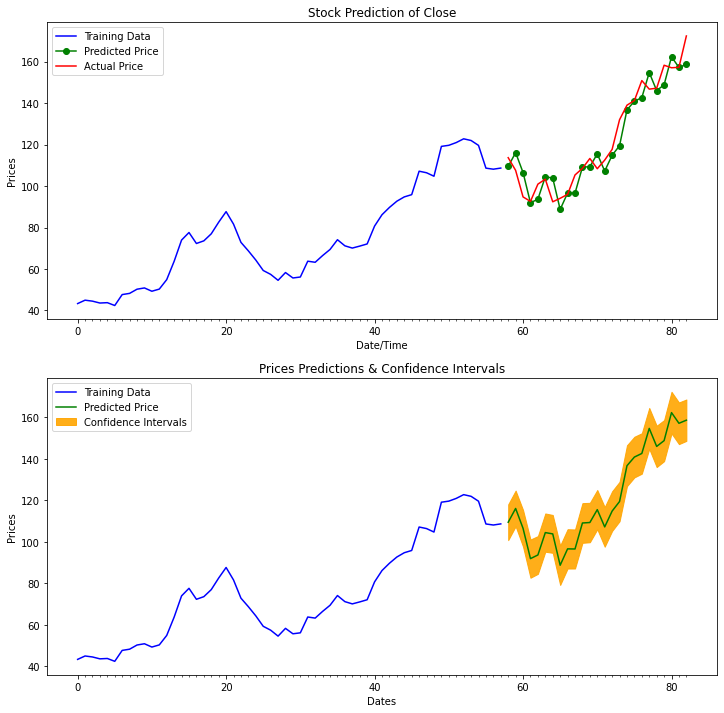

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
#y_train = train[attribute]
#test_data = test[attribute]

axes[0].plot(np.array(train[attribute]), color='blue', label='Training Data')
axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts, color='green', marker='o', label='Predicted Price')

axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], test[attribute], color='red', label='Actual Price')
axes[0].set_title('Stock Prediction of ' + attribute)
axes[0].set_xlabel('Date/Time')
axes[0].set_ylabel('Prices')

axes[0].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[0].legend()

# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(np.array(y_train), color='blue', label='Training Data')
axes[1].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between([len(train[attribute])+i for i in range(len(test[attribute]))],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[1].legend()



# Dynamic Forecasting
Uses each new forecast to make next prediction

In [ ]:
model = pm.ARIMA(order = (0,1,0), seasonal_order=(1, 0, 0, 7))
model.fit(train[attribute])

def dynamic_forecast():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts2 = []
confidence_intervals2 = []

for new_ob in test[attribute]:
    #fc - forecast 
    #conf - confidence interval
    fc, conf = dynamic_forecast()
    forecasts2.append(fc)
    confidence_intervals2.append(conf)

    # Updates the existing model with a small number of MLE steps
    # update(new_ob) = Step-wise, use real test values
    # update(fc) = Dynamic, use new forecasts
    model.update(fc) #It will take into account the actual outcome

print(f"Mean squared error: {mean_squared_error(y_test, forecasts2)}")
print(f"SMAPE: {smape(y_test, forecasts2)}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, forecasts2))}")
# Mean squared error: 0.34238951346274243
# SMAPE: 0.9825490519101439

Mean squared error: 303.3520586642307
SMAPE: 12.854834878708028
Root Mean squared error: 17.417004870649567


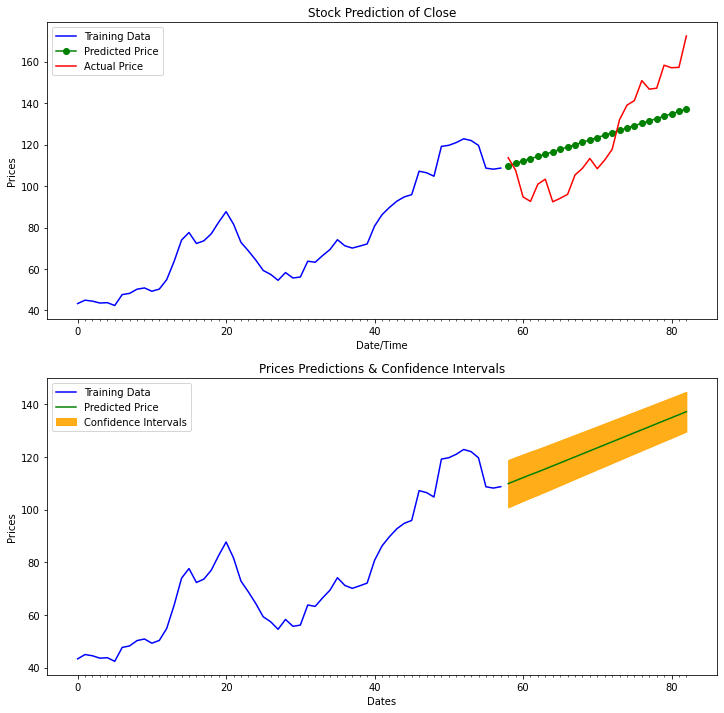

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
#y_train = train[attribute]
#test_data = test[attribute]

axes[0].plot(np.array(train[attribute]), color='blue', label='Training Data')
axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts2, color='green', marker='o', label='Predicted Price')

axes[0].plot([len(train[attribute])+i for i in range(len(test[attribute]))], test[attribute], color='red', label='Actual Price')
axes[0].set_title('Stock Prediction of ' + attribute)
axes[0].set_xlabel('Date/Time')
axes[0].set_ylabel('Prices')

axes[0].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[0].legend()

# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(np.array(y_train), color='blue', label='Training Data')
axes[1].plot([len(train[attribute])+i for i in range(len(test[attribute]))], forecasts2, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals2)
axes[1].fill_between([len(train[attribute])+i for i in range(len(test[attribute]))],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks([i for i in range(len(df[attribute]))], [i for i in range(len(df[attribute]))])
axes[1].legend()



If you want to look further into the future use LSTM, if you can afford to run stepwise then ARIMA is also a good option. 